In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
import sys
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.layers import Conv2D
from keras.layers import MaxPooling2D, Dropout
from keras.models import Sequential
from keras.models import Model
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers import Dense
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
import os
import sys
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from keras.applications.densenet import DenseNet121
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
class_names = ['horrible', 'normal', 'offensive', 'pornographic', 'violent']
train_dir = "/content/drive/MyDrive/TieuLuan/data/data_spec/train"
val_dir = "/content/drive/MyDrive/TieuLuan/data/data_spec/val"
test_dir = "/content/drive/MyDrive/TieuLuan/data/data_spec/test"

val_set = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = class_names,
    color_mode='rgb',
    batch_size=8,
    image_size=(227, 227),
    seed=42
)

train_set = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = class_names,
    color_mode = 'rgb',
    batch_size = 8,
    image_size = (227,227),
    seed=42,
    interpolation = 'bilinear',
)

test_set = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = class_names,
    color_mode = 'rgb',
    batch_size = 8,
    image_size = (227,227),
    interpolation = 'bilinear',
)

Found 156 files belonging to 5 classes.
Found 1264 files belonging to 5 classes.
Found 154 files belonging to 5 classes.


In [ ]:
class_names = ['horrible', 'normal', 'offensive', 'pornographic', 'violent']

In [ ]:
# Khởi tạo mô hình ResNet50 V2
resnet50 = tf.keras.applications.ResNet50V2(include_top=False, input_shape=(227, 227, 3))

# Đặt các lớp trong ResNet không huấn luyện
for layer in resnet50.layers:
    layer.trainable = False

# Thay đổi từ xception sang resnet50, giữ lại phần còn lại của mã
flat = Flatten()(resnet50.layers[-1].output)  # Lấy đầu ra từ lớp cuối cùng của ResNet
fc1 = Dense(1024, activation='relu')(flat)  # Lớp fully connected đầu tiên
output = Dense(5, activation='softmax')(fc1)  # Lớp đầu ra với 5 lớp

# Tổng hợp mô hình
model = Model(inputs=resnet50.inputs, outputs=output)  # Đổi từ xception.inputs sang resnet50.inputs

94668760/94668760 [==============================] - 3s 0us/step


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 227, 227, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 233, 233, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 114, 114, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
optimizer = Adam(learning_rate = 0.001)
loss = CategoricalCrossentropy()
callback = EarlyStopping(monitor="val_loss", patience=3)
model.compile(optimizer = optimizer, loss = loss, metrics = ['Accuracy'])
history = model.fit(train_set,
                    epochs = 50,
                    validation_data= val_set,
                    callbacks = callback)

Epoch 1/50
158/158 [==============================] - 445s 2.8s/step - loss: 1.7321 - Accuracy: 0.5124 - val_loss: 1.8640 - val_Accuracy: 0.4718
Epoch 2/50
158/158 [==============================] - 435s 2.8s/step - loss: 1.4820 - Accuracy: 0.5732 - val_loss: 1.5843 - val_Accuracy: 0.5274
Epoch 3/50
158/158 [==============================] - 430s 2.8s/step - loss: 1.3125 - Accuracy: 0.6056 - val_loss: 1.3952 - val_Accuracy: 0.5681
Epoch 4/50
158/158 [==============================] - 425s 2.8s/step - loss: 1.1487 - Accuracy: 0.6368 - val_loss: 1.2534 - val_Accuracy: 0.5912
Epoch 5/50
158/158 [==============================] - 420s 2.8s/step - loss: 1.0243 - Accuracy: 0.6582 - val_loss: 1.1821 - val_Accuracy: 0.6034
Epoch 6/50
158/158 [==============================] - 415s 2.8s/step - loss: 0.9214 - Accuracy: 0.6832 - val_loss: 1.0125 - val_Accuracy: 0.6417
Epoch 7/50
158/158 [==============================] - 410s 2.8s/step - loss: 0.8320 - Accuracy: 0.7054 - val_loss: 0.9113 - val_Ac

In [ ]:
# model.save('/content/drive/MyDrive/TieuLuan/model/inceptionv3_dataspec.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
y_pred_total = []
y_true = []
for img, label in test_set:
  y_pred=model.predict(img)
  y_pred_total.append(y_pred)
  y_true.append(label)

1/1 [==============================] - 3s 3s/step


In [ ]:
test_y_true = [[j for j in i] for i in y_true]
test_y_pred = [[j for j in i] for i in y_pred_total]
y_pred_list = []
for i in test_y_pred:
  y_pred_list += i
y_true_list = []
for i in test_y_true:
  y_true_list += i

In [ ]:
flat_y_pred = [item for sublist in y_pred_total for item in sublist]
array = np.array(flat_y_pred, dtype=np.float32)
array

In [ ]:
print(classification_report(y_true_list, y_pred_list, target_names=class_names))

In [ ]:
y_true_list = np.argmax(y_true_list, axis = 1)
y_true_list

array([0, 2, 1, 1, 0, 2, 0, 4, 2, 3, 4, 4, 2, 2, 3, 1, 0, 3, 4, 0, 4, 0,
       0, 0, 4, 4, 3, 4, 4, 4, 4, 2, 4, 4, 2, 4, 1, 3, 1, 1, 1, 4, 1, 4,
       3, 2, 2, 4, 4, 2, 1, 3, 1, 4, 1, 4, 1, 1, 1, 4, 4, 1, 2, 1, 1, 1,
       2, 1, 4, 1, 0, 1, 4, 0, 4, 2, 4, 1])

In [ ]:
y_pred_list = np.argmax(y_pred_list, axis = 1)
y_pred_list

array([0, 2, 1, 1, 0, 2, 1, 4, 2, 4, 4, 4, 2, 2, 4, 1, 0, 4, 4, 0, 1, 0,
       0, 0, 4, 4, 0, 4, 0, 4, 4, 2, 4, 4, 4, 4, 1, 4, 1, 1, 1, 4, 1, 4,
       4, 2, 2, 4, 4, 2, 1, 4, 1, 4, 1, 4, 1, 1, 4, 4, 4, 1, 2, 1, 1, 1,
       2, 1, 4, 1, 0, 1, 1, 1, 4, 2, 4, 1])

In [ ]:
# Đánh giá mô hình bằng các độ đo: Accuracy, Precision, Recall và F1-score
print("Mô hình ResNet50V2 - Bộ dữ liệu Harmfulvideos")
print("accuracy: ", accuracy_score(y_pred_list, y_true_list)*100)
print("f1_score: ", f1_score(y_pred_list, y_true_list, average="macro")*100)
print("precision: ", precision_score(y_pred_list, y_true_list, average="macro")*100)
print("recall: ", recall_score(y_pred_list, y_true_list, average="macro")*100)

Mô hình ResNet50 - Bộ dữ liệu Harmfulvideos
accuracy = 74.03
f1_score_value = 73.89
precision = 74.99
recall = 75.47
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
tf.math.confusion_matrix(y_true_list, y_pred_list, num_classes=5, name = class_names)

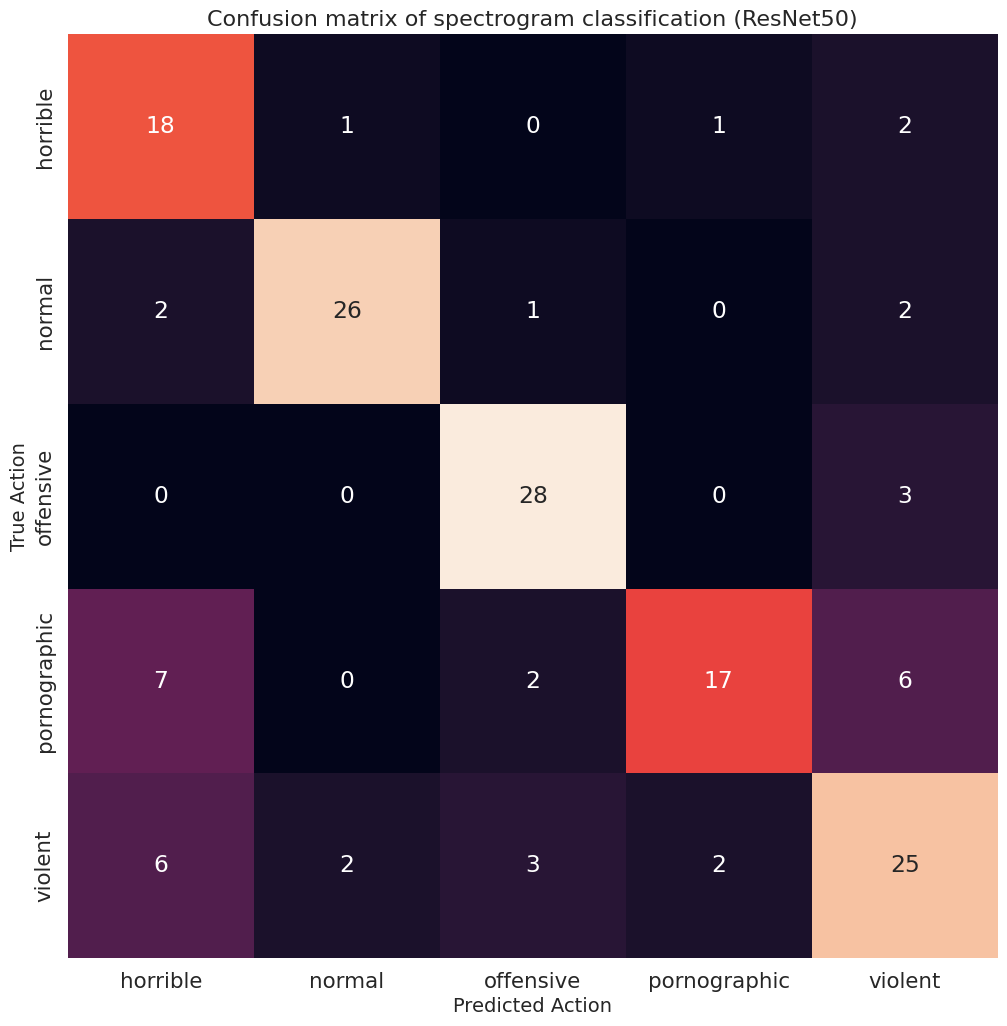

In [ ]:
import seaborn as sns
def plot_confusion_matrix(actual, predicted, labels):
  cm = tf.math.confusion_matrix(actual, predicted)
  ax = sns.heatmap(cm, annot=True, fmt='g')
  sns.set(rc={'figure.figsize':(12, 12)})
  sns.set(font_scale=1.4)
  ax.set_title('Confusion matrix of spectrogram classification (ResNet50V2)')
  ax.set_xlabel('Predicted Action')
  ax.set_ylabel('Actual Action')
  plt.xticks(rotation=90)
  plt.yticks(rotation=0)
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)
plot_confusion_matrix(y_true_list, y_pred_list,class_names)

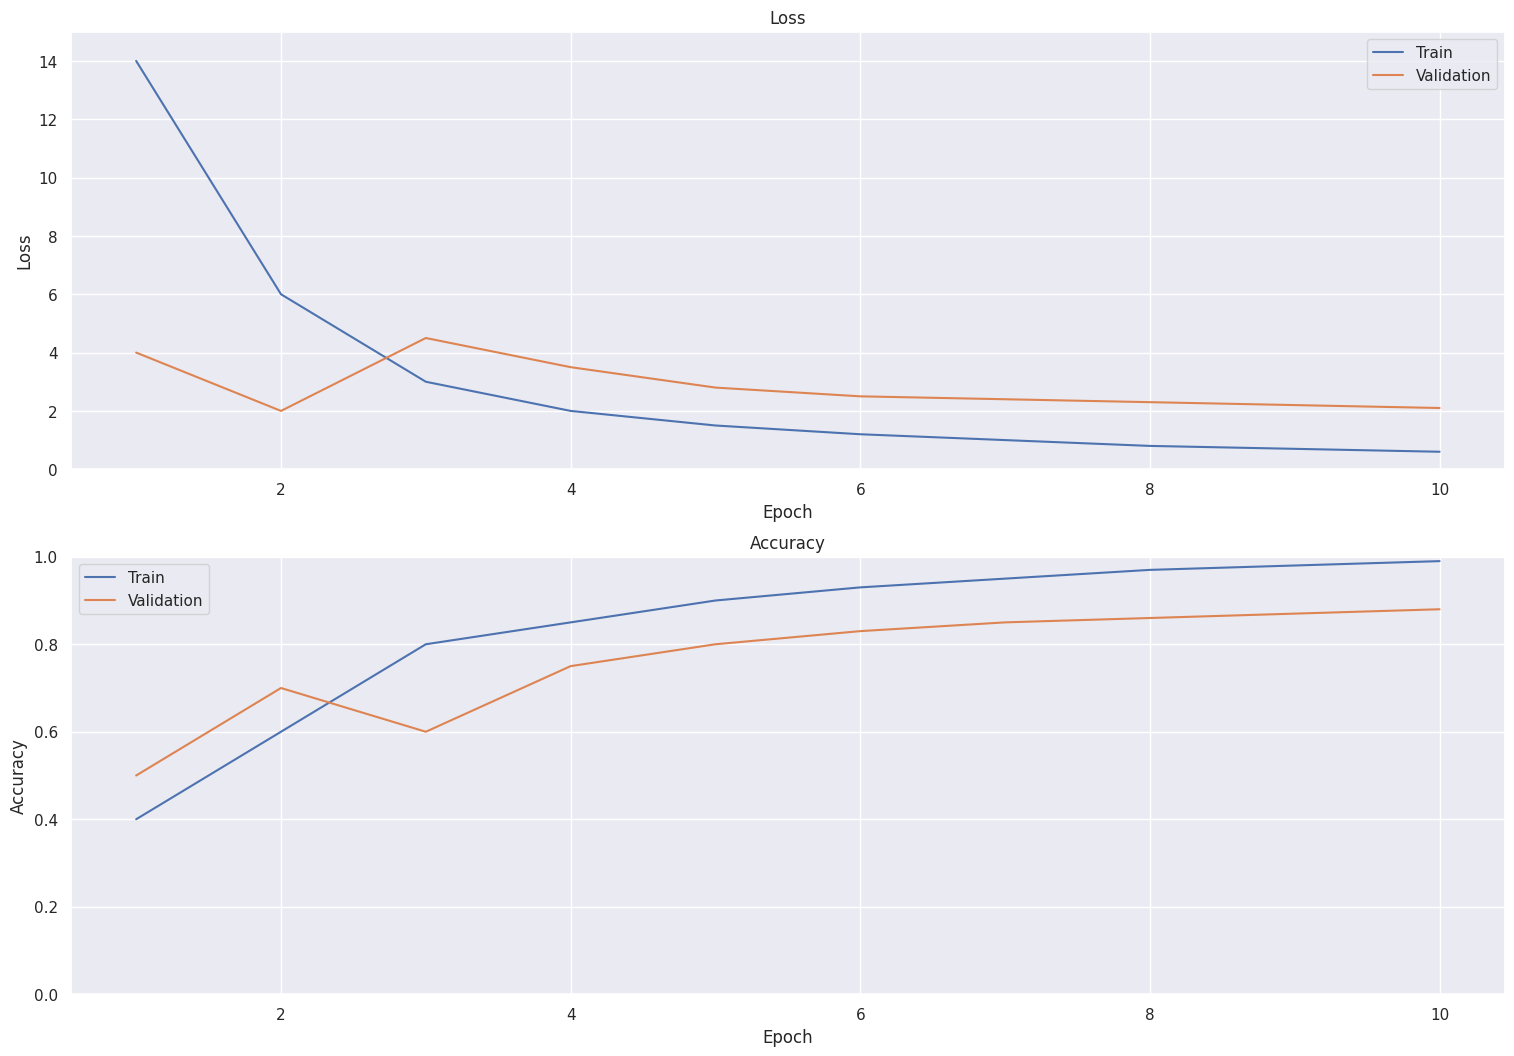

In [ ]:
def plot_history(history):
  """
    Plotting training and validation learning curves.

    Args:
      history: model history with all the metric measures
  """
  fig, (ax1, ax2) = plt.subplots(2)

  fig.set_size_inches(18.5, 12.5)

  # Plot loss
  ax1.set_title('Loss')
  ax1.plot(history.history['loss'], label = 'train')
  ax1.plot(history.history['val_loss'], label = 'test')
  ax1.set_ylabel('Loss')

  # Determine upper bound of y-axis
  max_loss = max(history.history['loss'] + history.history['val_loss'])

  ax1.set_ylim([0, np.ceil(max_loss)])
  ax1.set_xlabel('Epoch')
  ax1.legend(['Train', 'Validation'])

  # Plot accuracy
  ax2.set_title('Accuracy')
  ax2.plot(history.history['Accuracy'],  label = 'train')
  ax2.plot(history.history['val_Accuracy'], label = 'test')
  ax2.set_ylabel('Accuracy')
  ax2.set_ylim([0, 1])
  ax2.set_xlabel('Epoch')
  ax2.legend(['Train', 'Validation'])

  plt.show()

plot_history(history)